<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/1.2-LifeExpectancyData_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math

x1,x2,x3,y = np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/life-expectancy-without-country-names.txt",skiprows=1, unpack=True, dtype=np.float64)
bias=np.ones(x1.size, dtype=np.float64)
X = np.column_stack((bias,x1, x2, x3))
Y = y.reshape(-1, 1)
print(f"Xshape={X.shape} yshape={y.shape} Yshape={Y.shape}")


Xshape=(167, 4) yshape=(167,) Yshape=(167, 1)


In [73]:
print(f"x={X.dtype} y={Y.dtype} ")

x=float64 y=float64 


In [74]:
def predict(X,w):
  return np.matmul(X,w)

In [75]:
def gradient(X,Y,w):
  error=predict(X,w) - Y
  return 2 * np.matmul(X.T, (error)) / X.shape[0]

In [76]:
def loss(X, Y, w):
  return np.average((predict(X,w) - Y) ** 2)

In [77]:
def train(X,Y, iterations, lr):
  w=np.zeros((X.shape[1], 1), dtype=np.float64)
  for i in range(iterations):
    print(f"iteration {i} => loss {loss(X,Y,w)}")
    w -= gradient(X, Y, w) * lr
  return w

In [78]:
w = train(X,Y, iterations=100_000, lr=0.00001)

Streaming output truncated to the last 5000 lines.
iteration 95000 => loss 50.49895923686672
iteration 95001 => loss 50.498939648398036
iteration 95002 => loss 50.498920059944716
iteration 95003 => loss 50.49890047150679
iteration 95004 => loss 50.498880883084226
iteration 95005 => loss 50.498861294677035
iteration 95006 => loss 50.49884170628522
iteration 95007 => loss 50.498822117908766
iteration 95008 => loss 50.498802529547696
iteration 95009 => loss 50.498782941201995
iteration 95010 => loss 50.49876335287167
iteration 95011 => loss 50.49874376455673
iteration 95012 => loss 50.49872417625712
iteration 95013 => loss 50.49870458797294
iteration 95014 => loss 50.49868499970409
iteration 95015 => loss 50.498665411450645
iteration 95016 => loss 50.49864582321255
iteration 95017 => loss 50.49862623498983
iteration 95018 => loss 50.49860664678248
iteration 95019 => loss 50.49858705859052
iteration 95020 => loss 50.49856747041392
iteration 95021 => loss 50.49854788225269
iteration 95022 =

In [79]:
print(f"weights:{w.T}")
print(f"Life expectancy Predictions:")
pdWeights = []
for i in range(5):
  prediction={}
  prediction["prediction"] = predict(X[i], w)[0]
  prediction["label"] =Y[i][0]
  print(f"X[{i}] -> {prediction.get('prediction')} (label:{prediction['label']})")
  pdWeights.append(prediction)

weights:[[1.44491338 0.07335905 0.82643643 0.69174798]]
Life expectancy Predictions:
X[0] -> 74.81749395204889 (label:76.251999)
X[1] -> 76.1625875876428 (label:74.254997)
X[2] -> 78.8418127917688 (label:82.558998)
X[3] -> 81.08775712778925 (label:81.25)
X[4] -> 68.11716797697234 (label:71.800003)


In [80]:
import pandas as pd
df = pd.DataFrame(pdWeights)
df

,prediction,label
0,74.817494,76.251999
1,76.162588,74.254997
2,78.841813,82.558998
3,81.087757,81.250000
4,68.117168,71.800003


In [81]:
import pandas as pd
df = pd.DataFrame(w.reshape(1,4), columns=["bias", "Pollution","Healthcare","Water"])
df

,bias,Pollution,Healthcare,Water
0,1.444913,0.073359,0.826436,0.691748


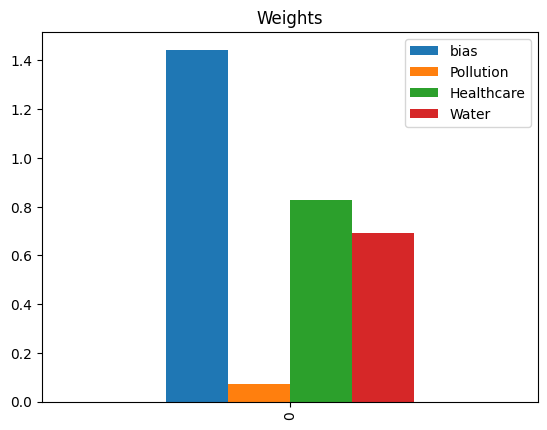

In [82]:
import matplotlib.pyplot as plt

df.plot(kind="bar")
plt.title("Weights")
plt.show()